ValueError: could not convert string to float: 'shuga rush'

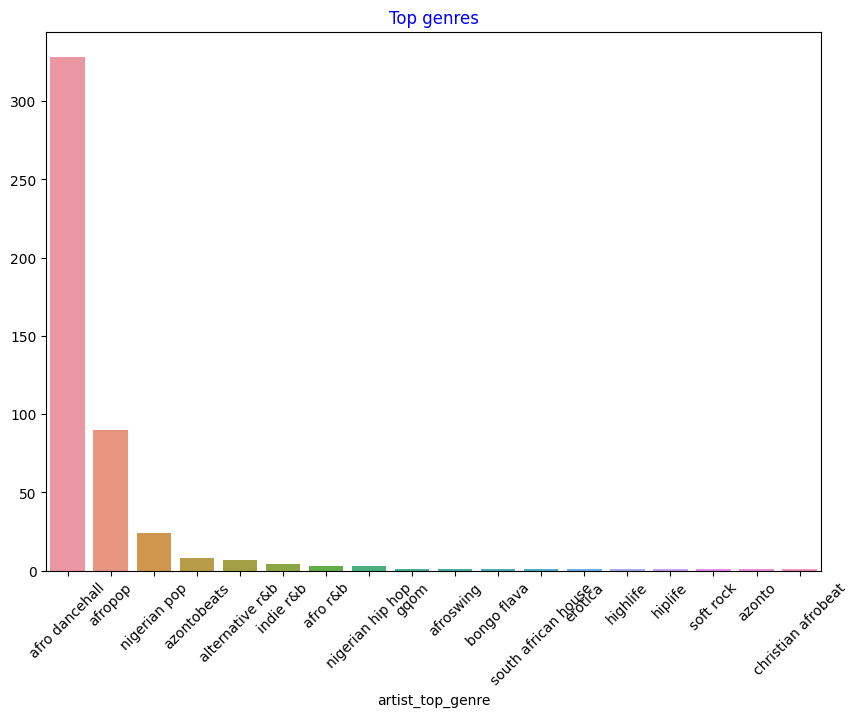

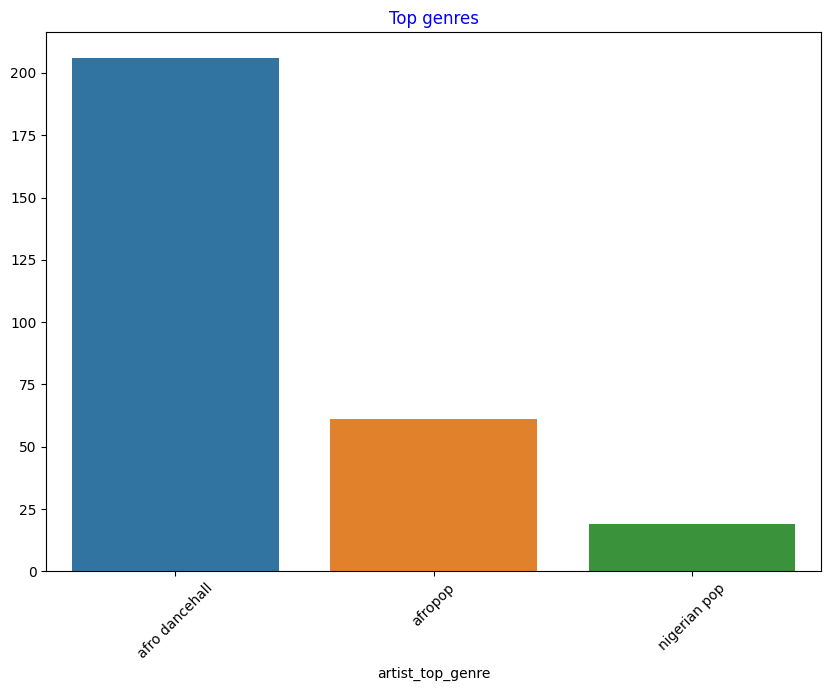

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:\\Users\\HP\\Desktop\\-ArewaDS-Machine-Learning-Assignments--1\\Data\\nigerian-songs.csv")
#df.tail()

#Get some information about the dataframe, calling info():
#df.info()

#Double-check for null values, by calling isnull() and verifying the sum being 0:
#df.isnull().sum()

#Describe the data:
df.describe()

# If we are working with clustering, an unsupervised method that does not require labeled data, why are we showing this data with labels? 
# In the data exploration phase, they come in handy, but they are not necessary for the clustering algorithms to work. You could just as 
# well remove the column headers and refer to the data by column number. Look at the general values of the data. Note that popularity can 
# be '0', which show songs that have no ranking. Let's remove those shortly.

#Use a barplot to find out the most popular genres:
import seaborn as sns

#top = df['artist_top_genre'].value_counts()
#plt.figure(figsize=(10,7))
#sns.barplot(x=top[:5].index,y=top[:5].values)
#plt.xticks(rotation=45)
#plt.title('Top genres',color = 'blue')

# If you'd like to see more top values, change the top [:5] to a bigger value, or remove it to see all. Note, when the top genre is described
# as 'Missing', that means that Spotify did not classify it, so let's get rid of it. 

# Get rid of missing data by filtering it out:

df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

#By far, the top three genres dominate this dataset. Let's concentrate on afro dancehall, afropop, and nigerian pop, additionally filter the 
# dataset to remove anything with a 0 popularity value (meaning it was not classified with a popularity in the dataset and can be considered 
# noise for our purposes):

df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres', color = 'blue')

#Do a quick test to see if the data correlates in any particularly strong way:

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)